# Extract Data from yfinance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

df = yf.download('TSLA', 
                  start='2019-01-01', 
                  end='2024-4-29', 
                  progress=False)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-22,140.559998,144.440002,138.800003,142.050003,142.050003,107097600
2024-04-23,143.330002,147.259995,141.110001,144.679993,144.679993,124545100
2024-04-24,162.839996,167.970001,157.509995,162.130005,162.130005,181178000
2024-04-25,158.960007,170.880005,158.360001,170.179993,170.179993,126427500
2024-04-26,168.850006,172.119995,166.369995,168.289993,168.289993,109815700


In [2]:
df['Date'] = df.index  # Create a new column 'Date' with the index values
df.reset_index(drop=True, inplace=True) 

In [3]:
close_df = df[['Date', 'Close']]

# Create a Window Function

In [4]:
def window(df, column_name, k):
    df_copy = df.copy()  
    for i in range(1, k + 1):
        new_column_name = f"{column_name}-{i}"
        df_copy[new_column_name] = df_copy[column_name].shift(i)
    # Swap column names
    column_names = list(df_copy.columns)
    return df_copy.iloc[:, ::-1].drop(range(k))

window_size = 60
close_df = window(close_df, 'Close', window_size)
#close_df = close_df.drop(columns = ['Date'])
close_df.tail(10)

,Close-60,Close-59,Close-58,Close-57,Close-56,Close-55,Close-54,Close-53,Close-52,Close-51,...,Close-8,Close-7,Close-6,Close-5,Close-4,Close-3,Close-2,Close-1,Close,Date
1329,211.880005,212.190002,208.800003,209.139999,207.830002,182.630005,183.250000,190.929993,191.589996,187.289993,...,168.380005,171.110001,164.899994,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,2024-04-15
1330,212.190002,208.800003,209.139999,207.830002,182.630005,183.250000,190.929993,191.589996,187.289993,188.860001,...,171.110001,164.899994,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,2024-04-16
1331,208.800003,209.139999,207.830002,182.630005,183.250000,190.929993,191.589996,187.289993,188.860001,187.910004,...,164.899994,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,2024-04-17
1332,209.139999,207.830002,182.630005,183.250000,190.929993,191.589996,187.289993,188.860001,187.910004,181.059998,...,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,2024-04-18
1333,207.830002,182.630005,183.250000,190.929993,191.589996,187.289993,188.860001,187.910004,181.059998,185.100006,...,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,2024-04-19
1334,182.630005,183.250000,190.929993,191.589996,187.289993,188.860001,187.910004,181.059998,185.100006,187.580002,...,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,2024-04-22
1335,183.250000,190.929993,191.589996,187.289993,188.860001,187.910004,181.059998,185.100006,187.580002,189.559998,...,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,2024-04-23
1336,190.929993,191.589996,187.289993,188.860001,187.910004,181.059998,185.100006,187.580002,189.559998,193.570007,...,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,2024-04-24
1337,191.589996,187.289993,188.860001,187.910004,181.059998,185.100006,187.580002,189.559998,193.570007,188.130005,...,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,170.179993,2024-04-25
1338,187.289993,188.860001,187.910004,181.059998,185.100006,187.580002,189.559998,193.570007,188.130005,184.020004,...,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,170.179993,168.289993,2024-04-26


In [5]:
close_df_copy = close_df.copy()
close_df_copy = close_df_copy.drop('Date', axis = 1)

# Skewness

In [6]:
for col in close_df_copy.columns:
    print(col, close_df_copy[col].skew())

Close-60 -0.17451077648715665
Close-59 -0.1764123670643842
Close-58 -0.1782816813980174
Close-57 -0.18002272826924998
Close-56 -0.18186532856413232
Close-55 -0.183758459686106
Close-54 -0.18569418871361518
Close-53 -0.18771699103567296
Close-52 -0.1896283788828167
Close-51 -0.1914378875747717
Close-50 -0.19335473643764137
Close-49 -0.1955089381149802
Close-48 -0.1976533318310344
Close-47 -0.19962324870788395
Close-46 -0.2016076651106614
Close-45 -0.20362963812675097
Close-44 -0.2055433731920869
Close-43 -0.2076116040257576
Close-42 -0.2096834547901803
Close-41 -0.21179967989826404
Close-40 -0.2139242514645419
Close-39 -0.21605957055533015
Close-38 -0.21790383377447656
Close-37 -0.21958662799747347
Close-36 -0.22118393010980095
Close-35 -0.2228199561701351
Close-34 -0.22436774091069592
Close-33 -0.2259640532443867
Close-32 -0.22756059938054096
Close-31 -0.22897191177165305
Close-30 -0.23021696373956285
Close-29 -0.23147656726290647
Close-28 -0.23296869400435175
Close-27 -0.2343983009417

In [7]:
X = close_df_copy.drop(columns = 'Close')
y = close_df_copy['Close'] 

In [8]:
print(X.shape, y.shape)

(1279, 60) (1279,)


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.to_numpy().reshape(-1, 1))

In [10]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

In [11]:
print(X_train.shape, X_test.shape)

(1023, 60) (256, 60)


# Machine Learning

# Parametric Approch

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

lr = LinearRegression()
ridge = Ridge()
EN = ElasticNet()

In [13]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_mape(actual, forecast):
    
    if len(actual) != len(forecast):
        raise ValueError("Length of actual and forecast lists must be the same")
    
    absolute_errors = [abs(actual[i] - forecast[i]) for i in range(len(actual))]
    percentage_errors = [absolute_errors[i] / actual[i] * 100 for i in range(len(actual))]
    mape = sum(percentage_errors) / len(actual)
    return mape
    
def rearrange(y):
    y_lst = []
    for i in y:
        for j in i:
         y_lst.append(j)
    return y_lst
    
def non_parametric(model):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_pred_full_scaled = scaler_y.inverse_transform(train_pred.reshape(-1, 1))
    train_full_scaled = scaler_y.inverse_transform(y_train)
    
    y_TRAIN = train_full_scaled
    y_PRED_TRAIN = train_pred_full_scaled
    
    pred_full_scaled = scaler_y.inverse_transform(test_pred.reshape(-1, 1))
    test_full_scaled = scaler_y.inverse_transform(y_test)
    
    y_TEST = test_full_scaled
    y_PRED = pred_full_scaled
    
    y_TEST = y_TEST[-256:]
    y_PRED = y_PRED[-256:]
    
    mae = mean_absolute_error(y_TEST, y_PRED)
    RMSE = rmse(y_TEST, y_PRED)
    MAPE =  calculate_mape(y_TEST, y_PRED)
    r2 = r2_score(y_TEST, y_PRED)
    return mae, RMSE, MAPE, r2, model, rearrange(y_TRAIN), rearrange(y_PRED_TRAIN), rearrange(y_TEST), rearrange(y_PRED)


def visual(model, y_TRAIN, y_PRED_TRAIN, y_TEST, y_PRED):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        #pred = model.predict(X_train).flatten()
        train_results = pd.DataFrame(data={'Train Predictions':y_PRED_TRAIN, 'Actuals':y_TRAIN, 'Date': close_df['Date'].iloc[:train_size]})
        train_results.set_index('Date', inplace=True)

        plt.plot(train_results['Train Predictions'], label = 'Train Predictions')
        plt.plot(train_results['Actuals'], label = 'Train')
        plt.title('Training vs Predicitions')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        #pred = model.predict(X_test).flatten()
        test_results = pd.DataFrame(data={'Test Predictions':y_PRED, 'Actuals':y_TEST, 'Date': close_df['Date'].iloc[-256:]})
        test_results.set_index('Date', inplace = True)
        plt.plot(test_results['Test Predictions'], label = 'Test Predictions')
        plt.plot(test_results['Actuals'], label = 'Test')
        plt.title('Testing vs Predicitions')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Linear Regression

In [14]:
mae_lr, rmse_lr, mape_lr, r2_lr, model_lr, y_train_lr, y_train_pred_lg, y_test_lr, y_test_pred_lg = non_parametric(lr)
print("MAE:", mae_lr)
print("RMSE", rmse_lr)
print("MAPE", mape_lr)
print("R2", r2_lr)

MAE: 5.562237628603295
RMSE 7.236937339522139
MAPE [2.57045454]
R2 0.9630077981507318


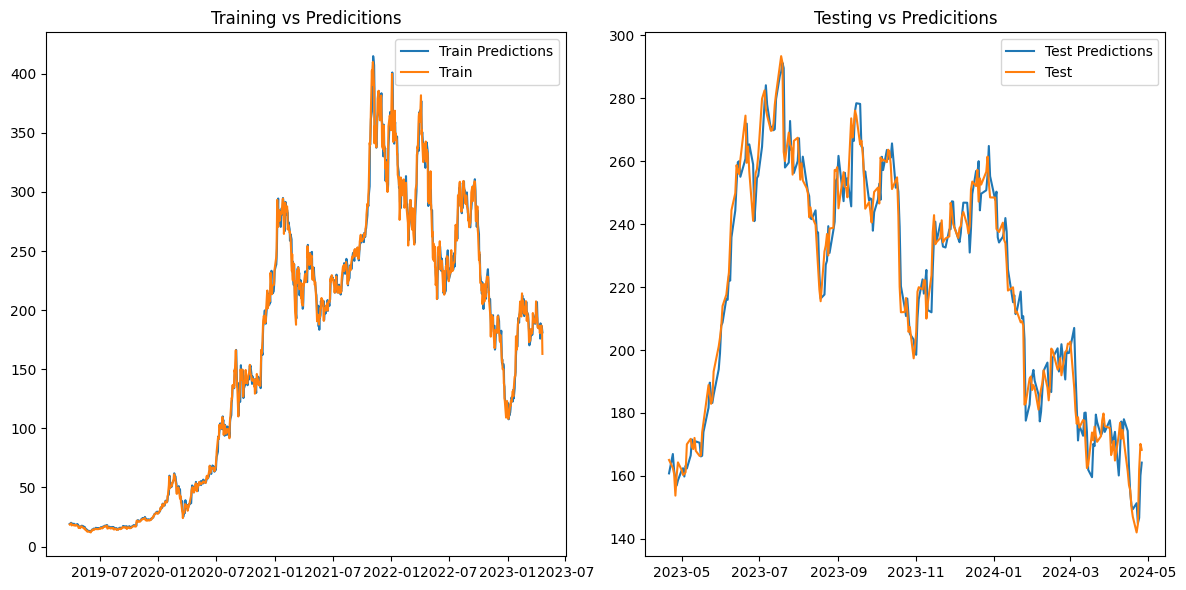

In [15]:
visual(model_lr,  y_train_lr, y_train_pred_lg, y_test_lr, y_test_pred_lg)

# Ridge Regression

In [16]:
mae_ridge, rmse_ridge, mape_ridge, r2_ridge, model_ridge, y_train_ridge, y_train_pred_ridge, y_test_ridge, y_test_pred_ridge = non_parametric(ridge)

print("MAE:", mae_ridge)
print("RMSE", rmse_ridge)
print("MAPE", mape_ridge)
print("R2", r2_ridge)

MAE: 6.359555952703133
RMSE 8.187949447772235
MAPE [2.94548964]
R2 0.9526466331696725


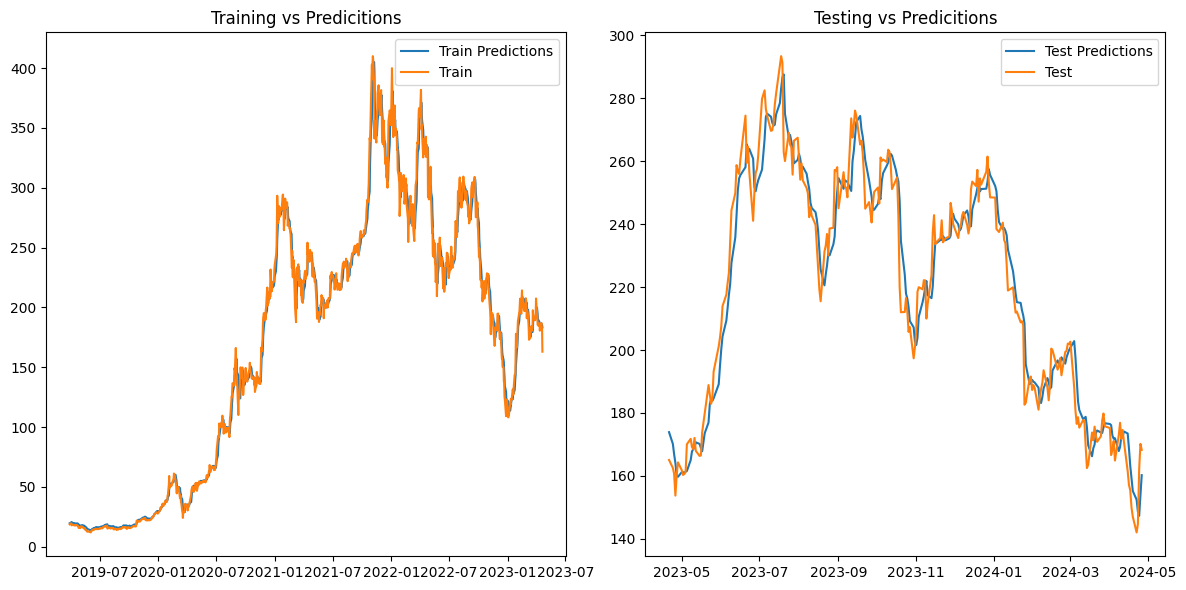

In [17]:
visual(model_ridge, y_train_ridge, y_train_pred_ridge, y_test_ridge, y_test_pred_ridge)

# Non-Parametric Approch

In [18]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
xgb = XGBRegressor()
lgm = LGBMRegressor(verbose=-1)
cat = CatBoostRegressor(silent=True)

# Gradient Boosting

In [19]:
mae_gb, rmse_gb, mape_gb, r2_gb, model_gb, y_train_gb, y_train_pred_gb, y_test_gb, y_test_pred_gb = non_parametric(gb)
print("MAE:", mae_gb)
print("RMSE", rmse_gb)
print("MAPE", mape_gb)
print("R2", r2_gb)

C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MAE: 5.68541763687384
RMSE 7.482220394952002
MAPE [2.65154804]
R2 0.9604577342445221


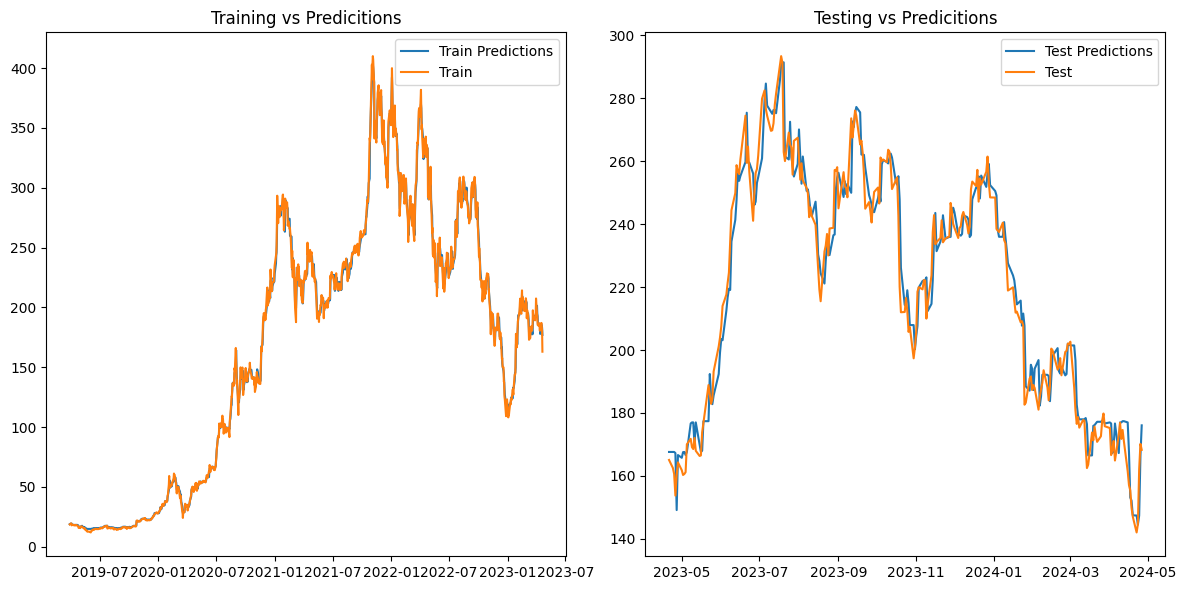

In [20]:
visual(model_gb, y_train_gb, y_train_pred_gb, y_test_gb, y_test_pred_gb)

# Random Forest

In [21]:
mae_rf, rmse_rf, mape_rf, r2_rf, model_rf, y_train_rf, y_train_pred_rf, y_test_rf, y_test_pred_rf = non_parametric(rf)
print("MAE:", mae_rf)
print("RMSE", rmse_rf)
print("MAPE", mape_rf)
print("R2", r2_rf)

C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 5.720543718338006
RMSE 7.612300194292758
MAPE [2.67572129]
R2 0.9590708834491398


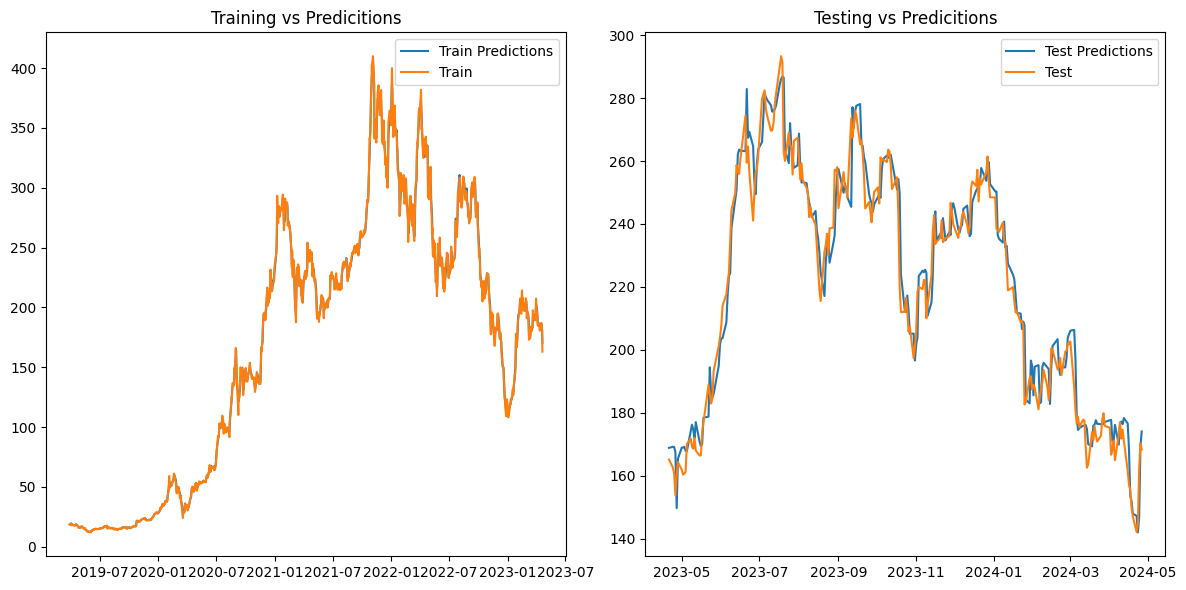

In [22]:
visual(model_rf, y_train_rf, y_train_pred_rf, y_test_rf, y_test_pred_rf)

# Extra Trees

In [23]:
mae_et, rmse_et, mape_et, r2_et, model_et, y_train_et, y_train_pred_et, y_test_et, y_test_pred_et = non_parametric(et)
print("MAE:", mae_et)
print("RMSE", rmse_et)
print("MAPE", mape_et)
print("R2", r2_et)

C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 5.937486150562769
RMSE 7.894662973029001
MAPE [2.75694552]
R2 0.9559782050575207


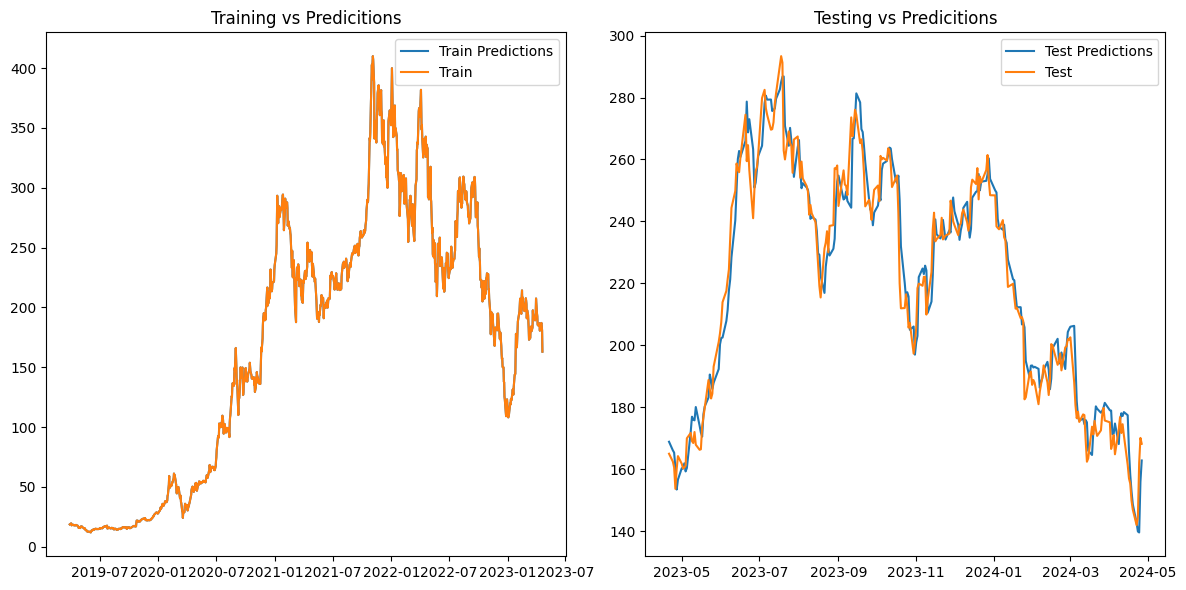

In [24]:
visual(model_et, y_train_et, y_train_pred_et, y_test_et, y_test_pred_et)

# XGB

In [25]:
mae_xgb, rmse_xgb, mape_xgb, r2_xgb, model_xgb, y_train_xgb, y_train_pred_xgb, y_test_xgb, y_test_pred_xgb = non_parametric(xgb)
print("MAE:", mae_xgb)
print("RMSE", rmse_xgb)
print("MAPE", mape_xgb)
print("R2", r2_xgb)

MAE: 6.62621921300888
RMSE 8.963377427173103
MAPE [3.07051805]
R2 0.9432528669284179


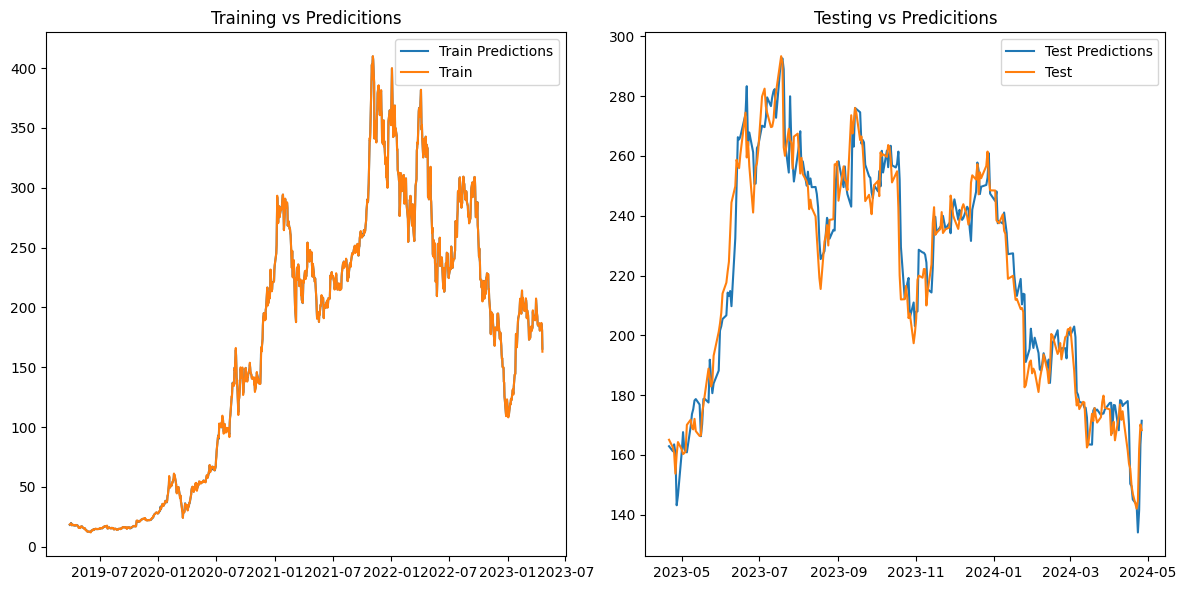

In [26]:
visual(model_xgb, y_train_xgb, y_train_pred_xgb, y_test_xgb, y_test_pred_xgb)

In [27]:
mae_lgm, rmse_lgm, mape_lgm, r2_lgm, model_lgm, y_train_lgm, y_train_pred_lgm, y_test_lgm, y_test_pred_lgm = non_parametric(lgm)
print("MAE:", mae_lgm)
print("RMSE", rmse_lgm)
print("MAPE", mape_lgm)
print("R2", r2_lgm)

MAE: 6.478959864352518
RMSE 8.640485072500912
MAPE [2.99348567]
R2 0.9472676888543062


C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


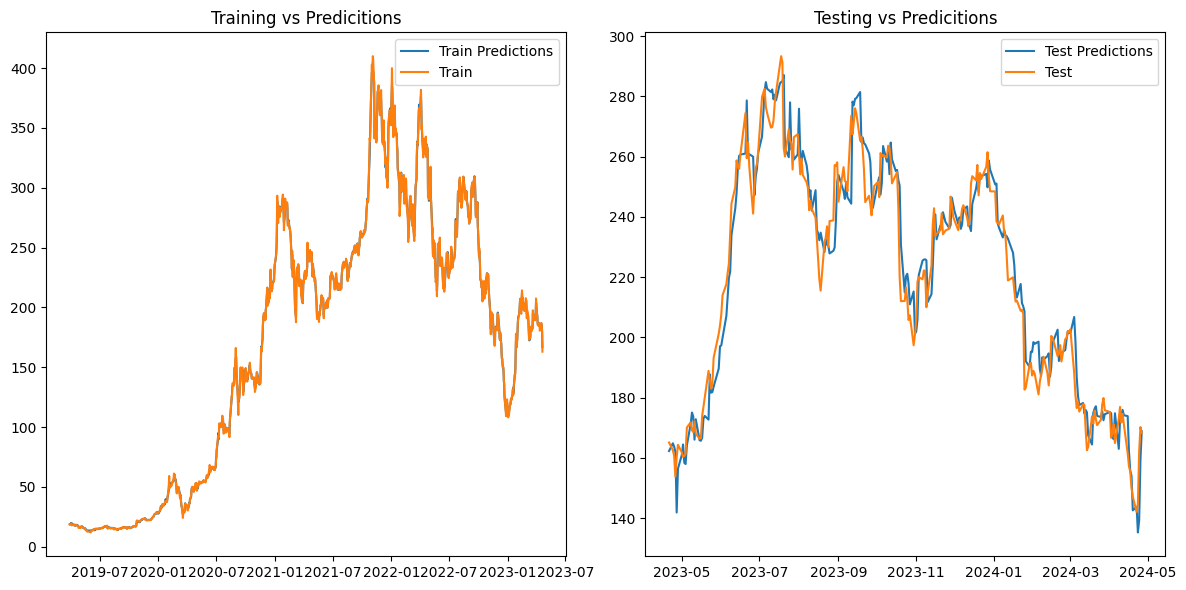

In [28]:
visual(model_lgm, y_train_lgm, y_train_pred_lgm, y_test_lgm, y_test_pred_lgm)

# CAT Boost

In [29]:
mae_cat, rmse_cat, mape_cat,r2_cat, model_cat, y_train_cat, y_train_pred_cat, y_test_cat, y_test_pred_cat = non_parametric(cat)
print("MAE:", mae_cat)
print("RMSE", rmse_cat)
print("MAPE", mape_cat)
print("R2", r2_cat)

MAE: 8.71313373567284
RMSE 11.093429185646947
MAPE [4.08714176]
R2 0.9130775040754701


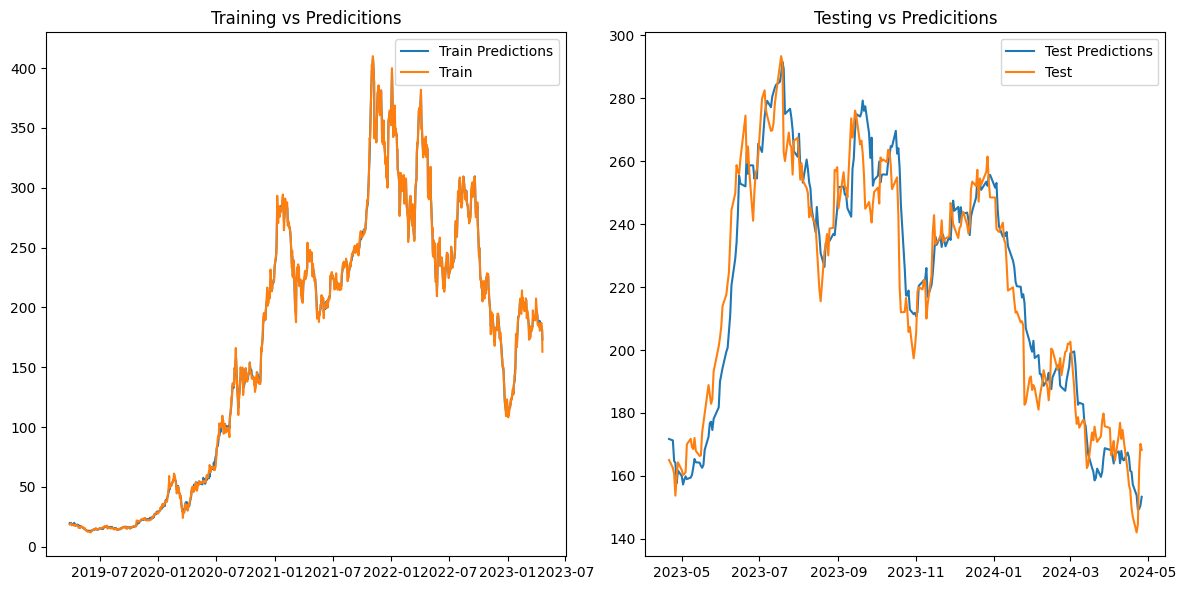

In [30]:
visual(model_cat, y_train_cat, y_train_pred_cat, y_test_cat, y_test_pred_cat)

In [31]:
model_df_non = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression','Gradient Boosting', 'Random Forest', 'Extra Tree', 'XGB', 'LGM', 'CAT'],
    'MAE': [mae_lr, mae_ridge, mae_gb, mae_rf, mae_et, mae_xgb, mae_lgm, mae_cat],
    'RMSE': [rmse_lr, rmse_ridge, rmse_gb, rmse_rf, rmse_et, rmse_xgb, rmse_lgm, rmse_cat],
    'MAPE': [mape_lr, mape_ridge,mape_gb, mape_rf, mape_et, mape_xgb, mape_lgm, mape_cat],
    'R2':[r2_lr, r2_ridge, r2_gb, r2_rf, r2_et, r2_xgb, r2_lgm, r2_cat]
})

model_df_non.sort_values(by = 'MAPE', ascending = True)

,Model,MAE,RMSE,MAPE,R2
0,Linear Regression,5.562238,7.236937,[2.5704545436063913],0.963008
2,Gradient Boosting,5.685418,7.482220,[2.651548035405415],0.960458
3,Random Forest,5.720544,7.612300,[2.6757212947801325],0.959071
4,Extra Tree,5.937486,7.894663,[2.7569455211989853],0.955978
1,Ridge Regression,6.359556,8.187949,[2.9454896369164016],0.952647
6,LGM,6.478960,8.640485,[2.9934856717697476],0.947268
5,XGB,6.626219,8.963377,[3.0705180543131574],0.943253
7,CAT,8.713134,11.093429,[4.087141764957422],0.913078
